
# Harry Potter Movie Dialogues Analysis

This Jupyter Notebook presents an analysis of dialogues from the first three Harry Potter movies. The goal is to perform data cleaning, exploration, and visualization to uncover insights into the characters and their dialogues.


## Data Loading & Preparation
We start by loading the dialogues from the first three Harry Potter movies. This involves reading CSV files, correcting inconsistencies in character names, and merging the data into a single DataFrame for comprehensive analysis. This step ensures our dataset is accurate and well-organized.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk import download
from collections import Counter
from nltk import bigrams, trigrams
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
# Load the datasets
hp1_df = pd.read_csv('data/Harry Potter 1.csv', delimiter=';')
hp2_df = pd.read_csv('data/Harry Potter 2.csv', delimiter=';')
hp3_df = pd.read_csv('data/Harry Potter 3.csv', delimiter=';')

In [3]:
# Add a 'Movie' column to each DataFrame to identify the source
hp1_df['Movie'] = 'movie_1'
hp2_df['Movie'] = 'movie_2'
hp3_df['Movie'] = 'movie_3'

## Text Preprocessing
Here, we clean and preprocess the text data, making it suitable for analysis. This involves tokenizing the dialogues, removing stopwords, and applying lemmatization techniques. These steps are crucial for reducing noise in the text and focusing on meaningful words.

In [4]:
hp1_df.head()

,Character,Sentence,Movie
0,Dumbledore,"I should've known that you would be here, Prof...",movie_1
1,McGonagall,"Good evening, Professor Dumbledore.",movie_1
2,McGonagall,"Are the rumors true, Albus?",movie_1
3,Dumbledore,"I'm afraid so, professor.",movie_1
4,Dumbledore,The good and the bad.,movie_1


In [5]:
hp2_df.head()

,Character,Sentence,Movie
0,HARRY,"I can’t let you out, Hedwig.",movie_2
1,HARRY,I’m not allowed to use magic outside of school.,movie_2
2,HARRY,"Besides, if Uncle Vernon…",movie_2
3,VERNON,Harry Potter!,movie_2
4,HARRY,Now you’ve done it.,movie_2


In [6]:
hp3_df.head()

,CHARACTER,SENTENCE,Movie
0,HARRY,Lumos Maxima...,movie_3
1,HARRY,Lumos Maxima...,movie_3
2,HARRY,Lumos Maxima...,movie_3
3,HARRY,Lumos... MAXIMA!,movie_3
4,AUNT PETUNIA,Harry! Harry!,movie_3


## Data Cleaning

Let's clean the data by fixing character name misspellings and ensuring consistency in character naming across the datasets.

In [7]:
hp3_df.rename(columns={'CHARACTER': 'Character', 'SENTENCE': 'Sentence'}, inplace=True)

In [8]:
hp1_df['Character'].sort_values().unique()

array(['All  ', 'All 3  ', 'Barkeep\xa0Tom', 'Boy', 'Boy  ', 'Class',
       'Crowd  ', 'Dean', 'Draco  ', 'Dudley', 'Dumbledore',
       'Dumbledore ', 'Dumbledore  ', 'Fat Lady', 'Filch', 'Filch ',
       'Filch  ', 'Firenze ', 'Firenze  ', 'Flint', 'Flint  ', 'Flitwick',
       'Flitwick  ', 'Fred', 'Fred  ', 'George', 'George  ', 'Ginny',
       'Girl', 'Girl  ', 'Goblin', 'Griphook', 'Gryffindors  ', 'Hagrid',
       'Hagrid ', 'Hagrid  ', 'Harry', 'Harry ', 'Harry  ', 'Hermione',
       'Hermione ', 'Hermione  ', 'Hermoine', 'Lee  Jordan', 'Lee Jordan',
       'Madam Hooch', 'Madam Hooch ', 'Malfoy', 'Man', 'Man  ',
       'Man in paint', 'McGonagall', 'McGonagall ', 'McGonagall  ',
       'Mrs. Weasley', 'Neville', 'Neville  ', 'OIiver  ', 'Oliver ',
       'Oliver  ', 'Ollivander', 'Percy', 'Percy  ', 'Petunia',
       'Quirrell', 'Quirrell ', 'Quirrell  ', 'Ron', 'Ron ', 'Ron  ',
       'Ron   ', 'Ron and Harry', 'Ron and Harry  ', 'Seamus', 'Seamus  ',
       'Sir Nicholas', 

In [9]:
hp2_df['Character'].sort_values().unique()

array(['ARAGOG', 'AUNT PETUNIA', 'AUNT\xa0PETUNIA\xa0& DUDLEY  ', 'BOY',
       'CLASS', 'COLIN', 'CORNISH PIXIES', 'CRABBE', 'DEAN', 'DIARY',
       'DOBBY', 'DOBBY ', 'DRACO', 'DUDLEY', 'DUDLEY ', 'DUMBLEDORE',
       'FILCH', 'FLINT', 'FRED', 'FRED ', 'FRED, GEORGE, RON  ',
       'FRED, GEORGE, RON, HARRY  ', 'FUDGE', 'GEORGE', 'GEORGE ',
       'GILDEROY LOCKHART', 'GINNY', 'GINNY ', 'HAGRID', 'HARRY',
       'HARRY ', 'HARRY AND RON', 'HARRY-RON-HERMIONE', 'HERMIONE',
       'JUSTIN FINCH-FLETCHLEY', 'LEE JORDAN', 'LOCKHART',
       'LUCIUS MALFOY', 'LUCIUS MALFOY ', 'MADAM POMFREY', 'MAN',
       'MCGONAGALL', 'MOANING MYRTLE', 'MR. BORGIN', 'MR. WEASLEY',
       'MRS. WEASLEY', 'MRS. WEASLEY ', 'NEVILLE', 'PENELOPE CLEARWATER',
       'PERCY', 'PERCY ', 'PETUNIA', 'PHOTOGRAPHER', 'PICTURE',
       'PROFESSOR SPROUT', 'RON', 'RON ', 'SEAMUS', 'SEAMUS ',
       'SIR NICHOLAS', 'SLYTHERINS', 'SNAPE', 'SORTING HAT', 'STUDENT',
       'TOM RIDDLE', 'TRAINMASTER', 'UNCLE VERNON', 'UN

In [10]:
hp3_df['Character'].sort_values().unique()

array(['\nSTAN SHUNPIKE', 'AUNT MARGE', 'AUNT PETUNIA', 'BEM', 'BOY',
       'BOY 1', 'BOY 2', 'CLASS', 'CRABBE', 'CROWD', 'DEAN', 'DRACO',
       'DUMBLEDORE', 'FAT LADY', 'FILCH', 'FRED', 'FRED & GEORGE',
       'FUDGE', 'GEORGE', 'GINNY', 'GOYLE', 'HAGRID', 'HARRY', 'HERMIONE',
       'HOUSEKEEPER', 'LUPIN', 'MADAM ROSMERTA', 'MAN', 'MCGONAGALL',
       'MR. WEASLEY', 'MRS. WEASLEY', 'NEVILLE', 'PANSY PARKINSON',
       'PARVATI', 'PERCY', 'PETTIGREW', 'RON', 'SEAMUS', 'SHRUNKEN HEAD',
       'SHRUNKEN HEAD 1', 'SHRUNKEN HEAD 2', 'SIRIUS', 'SNAPE',
       'STAN SHUNPIKE', 'TEACHER', 'TOM', 'TRELAWNEY', 'UNCLE VERNON',
       'VENDOR', 'VOICE', 'WITCH'], dtype=object)

In [11]:
# Camel Case all the Character Names
hp1_df['Character'] = hp1_df['Character'].str.title()
hp2_df['Character'] = hp2_df['Character'].str.title()
hp3_df['Character'] = hp3_df['Character'].str.title()

# Remove all blank spaces around each column
hp1_df['Character'] = hp1_df['Character'].apply(lambda x: x.strip() if isinstance(x, str) else x)
hp2_df['Character'] = hp2_df['Character'].apply(lambda x: x.strip()if isinstance(x, str) else x)
hp3_df['Character'] = hp3_df['Character'].apply(lambda x: x.strip()if isinstance(x, str) else x)

## Combine Datasets

After cleaning the data, we combine the datasets from all three movies into a single DataFrame for our analysis.

In [12]:
# Combine all DataFrames into one
combined_df = pd.concat([hp1_df, hp2_df, hp3_df])
combined_df.head()

,Character,Sentence,Movie
0,Dumbledore,"I should've known that you would be here, Prof...",movie_1
1,Mcgonagall,"Good evening, Professor Dumbledore.",movie_1
2,Mcgonagall,"Are the rumors true, Albus?",movie_1
3,Dumbledore,"I'm afraid so, professor.",movie_1
4,Dumbledore,The good and the bad.,movie_1


## Dialogue Count Analysis

We analyze the number of dialogues per character across the three movies to identify the most prominent characters in terms of dialogue frequency.

In [13]:
# Group by Character and Movie and count sentences
character_sentences = combined_df.groupby(['Character', 'Movie']).size()

# Unstack the movie level from the index to create columns
character_movie_counts = character_sentences.unstack(level=-1, fill_value=0)

# Reorder the columns to match the movie order
character_movie_counts = character_movie_counts[['movie_1', 'movie_2', 'movie_3']]

# Reset the index to have 'Character' as a column
character_movie_counts = character_movie_counts.reset_index()

# Calculate the total sentences for each character across all movies
character_movie_counts['Total'] = character_movie_counts[['movie_1', 'movie_2', 'movie_3']].sum(axis=1)

# Sort the DataFrame based on the total sentences to get the sorted top 10 characters
top_character_dialogues_sorted = character_movie_counts.sort_values(by='Total', ascending=False)[:10]

top_character_dialogues_sorted

Movie,Character,movie_1,movie_2,movie_3,Total
41,Harry,330,390,308,1028
78,Ron,210,175,151,536
44,Hermione,170,122,193,485
40,Hagrid,215,82,97,394
21,Dumbledore,75,88,76,239
52,Lupin,0,0,207,207
59,Mcgonagall,64,66,22,152
88,Snape,33,27,61,121
33,Gilderoy Lockhart,0,113,0,113
19,Draco,2,55,38,95


## Visualization - Dialogue Count
Visualize the dialogues counts for the top characters across the 3 Harry Potter movies.

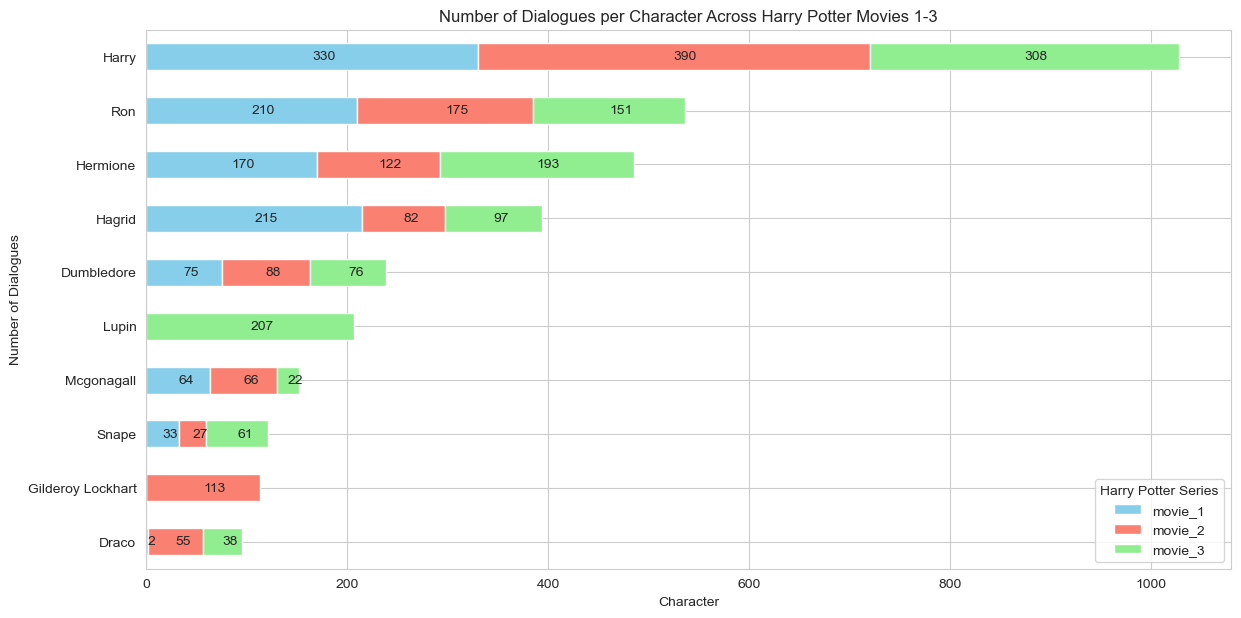

In [48]:
ax = top_character_dialogues_sorted.set_index('Character')[['movie_1', 'movie_2', 'movie_3']].plot(
    kind='barh', stacked=True, figsize=(14, 7),
    color=['skyblue', 'salmon', 'lightgreen'])

# ax = top_characters_data.set_index('Character').plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number of Dialogues per Character Across Harry Potter Movies 1-3')
plt.xlabel('Character')
plt.ylabel('Number of Dialogues')
plt.gca().invert_yaxis()  # To display the top character at the top of the chart
plt.legend(title='Harry Potter Series')

# Annotate each bar with the total count
for p in ax.patches:  # Loop through all the bars (patches)
    width = p.get_width()  # Get the width of the bar (total count)
    if width > 0:  # If the bar has width (count)
        ax.text(p.get_x() + width/2,  # X position for text
                p.get_y() + p.get_height() / 2,  # Y position for text
                int(width),  # The text (total count)
                va='center')  # Center alignment vertically

# Display the plot
plt.show()

## Understanding the Visualization - Number of Dialogues per Character
This visualization depicts the count of dialogues for central and secondary characters. The trio of Harry, Ron, and Hermione consistently leads in dialogue counts, confirming their central roles. The significant dialogue numbers for characters such as Snape and McGonagall across all movies suggest their integral roles in the overarching plot. Lupin was an important character in the 3rd movie, which can be seen from the chart as well. 

## Word Count Analysis

In this section, we calculate the number of words per character in each movie to assess the depth of their dialogues.

In [15]:
# Step 1: Count the Number of Words per Sentence for Each Character in Each Movie
def count_words(sentence):
    return len(sentence.split())


# Apply the function to count words in each sentence for each DataFrame
for df in [hp1_df, hp2_df, hp3_df]:
    df['WordCount'] = df['Sentence'].apply(count_words)

combined_df['WordCount'] = combined_df['Sentence'].apply(count_words)

# Group by Character and Movie and count sentences
character_words = combined_df.groupby(['Character', 'Movie'])['WordCount'].sum()

# Unstack the movie level from the index to create columns
character_movie_words_counts = character_words.unstack(level=-1, fill_value=0)

# Reorder the columns to match the movie order
character_movie_words_counts = character_movie_words_counts[['movie_1', 'movie_2', 'movie_3']]

# Reset the index to have 'Character' as a column
character_movie_words_counts = character_movie_words_counts.reset_index()


# Calculate the total sentences for each character across all movies
character_movie_words_counts['Total'] = character_movie_words_counts[['movie_1', 'movie_2', 'movie_3']].sum(axis=1)

# Sort the DataFrame based on the total sentences to get the sorted top characters
top_character_word_counts_sorted = character_movie_words_counts.sort_values(by='Total', ascending=False)[:10]

top_character_word_counts_sorted

Movie,Character,movie_1,movie_2,movie_3,Total
41,Harry,1685,2054,1357,5096
78,Ron,1024,836,768,2628
44,Hermione,915,725,978,2618
40,Hagrid,1446,536,557,2539
21,Dumbledore,736,743,625,2104
52,Lupin,0,0,1431,1431
59,Mcgonagall,518,550,168,1236
88,Snape,344,217,426,987
33,Gilderoy Lockhart,0,760,0,760
96,Tom Riddle,0,640,0,640


## Visualization - Word Count
Visualize the word counts for the top characters across the 3 Harry Potter movies.

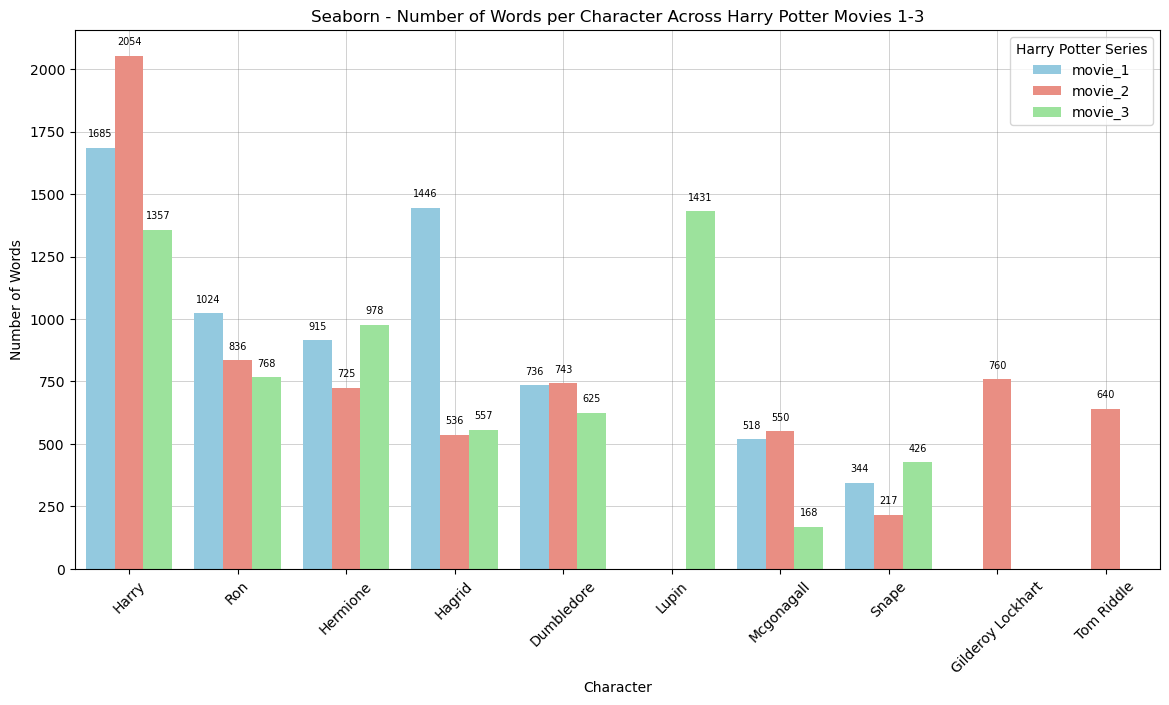

In [16]:
# Convert the DataFrame from wide to long format for easier plotting with Seaborn
df_long = pd.melt(top_character_word_counts_sorted, id_vars=['Character'], var_name='Movie', value_name='WordCount',
                  value_vars=['movie_1', 'movie_2', 'movie_3'])

# Now, let's plot with Seaborn
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='Character', y='WordCount', hue='Movie', data=df_long, palette=['skyblue', 'salmon', 'lightgreen'])

# Set grid lines behind the bars
ax.set_axisbelow(True)
ax.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)

# Add annotations for each bar
for p in ax.patches:
    # Check if the height of the bar is greater than 0 to avoid annotating 0 values
    if p.get_height() > 0:
        ax.annotate(f"{int(p.get_height())}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points',
                    color='black',
                    fontsize=7,
                    # weight='bold',
                    # backgroundcolor='white'
                    )

plt.title('Seaborn - Number of Words per Character Across Harry Potter Movies 1-3')
plt.xlabel('Character')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.legend(title='Harry Potter Series')

## Understanding the Visualization - Number of Words per Character
The bar chart provides a comparative view of each character's dialogue length across the Harry Potter series. Harry dominates in word count, highlighting his protagonist role. Hermione's increasing dialogue in successive movies might suggest her character's development and growing influence. Characters like Lupin and Lockhart show heightened engagement in specific movies, correlating with their narrative significance during those periods.


## Text Preprocessing for NLP

We preprocess the dialogue text for natural language processing. This includes tokenization, removing stopwords, and normalizing the text.

In [17]:
# # Download these NLTK resources
# download('stopwords')
# download('wordnet')
# download('omw-1.4')
# download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreenithi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
def preprocess(sentence, stemmer=PorterStemmer(), lemmatizer=WordNetLemmatizer()):
    sentence = str(sentence).lower()
    sentence = sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '', cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 and w not in stopwords.words('english')]
    # Choose either stemming or lemmatization:
    # processed_words = [stemmer.stem(w) for w in filtered_words]
    processed_words = [lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(processed_words)


# Apply the preprocessing function to the combined DataFrame
combined_df['Preprocessed'] = combined_df['Sentence'].apply(preprocess)
# Tokenize the preprocessed text
combined_df['Tokens'] = combined_df['Preprocessed'].apply(lambda x: x.split())
combined_df

,Character,Sentence,Movie,WordCount,Preprocessed,Tokens
0,Dumbledore,"I should've known that you would be here, Prof...",movie_1,10,known would professor mcgonagall,"[known, would, professor, mcgonagall]"
1,Mcgonagall,"Good evening, Professor Dumbledore.",movie_1,4,good evening professor dumbledore,"[good, evening, professor, dumbledore]"
2,Mcgonagall,"Are the rumors true, Albus?",movie_1,5,rumor true albus,"[rumor, true, albus]"
3,Dumbledore,"I'm afraid so, professor.",movie_1,4,afraid professor,"[afraid, professor]"
4,Dumbledore,The good and the bad.,movie_1,5,good bad,"[good, bad]"
...,...,...,...,...,...,...
1633,Hermione,"How fast is it, Harry?",movie_3,5,fast harry,"[fast, harry]"
1634,Harry,Lumos.,movie_3,1,lumos,[lumos]
1635,Harry,I solemnly swear that I am up to no good.,movie_3,10,solemnly swear good,"[solemnly, swear, good]"
1636,Harry,Mischief managed.,movie_3,2,mischief managed,"[mischief, managed]"


## Comparative Word Frequency
We compare the most common words between the three movies to explore shifts in thematic focus. This comparison helps us understand how the narrative evolves and highlights key elements specific to each movie. Through visual analysis, we aim to uncover interesting patterns in the series' language use.

In [19]:
# Flatten the list of tokens and perform frequency analysis
all_words = [word for sublist in combined_df['Tokens'] for word in sublist]
all_words[:50]

['known',
 'would',
 'professor',
 'mcgonagall',
 'good',
 'evening',
 'professor',
 'dumbledore',
 'rumor',
 'true',
 'albus',
 'afraid',
 'professor',
 'good',
 'bad',
 'boy',
 'hagrid',
 'bringing',
 'think',
 'wise',
 'trust',
 'hagrid',
 'something',
 'important',
 'professor',
 'would',
 'trust',
 'hagrid',
 'life',
 'professor',
 'dumbledore',
 'sir',
 'professor',
 'mcgonagall',
 'problem',
 'trust',
 'hagrid',
 'sir',
 'little',
 'tyke',
 'fell',
 'asleep',
 'flying',
 'bristol',
 'try',
 'wake',
 'albus',
 'really',
 'think',
 'safe']

In [20]:
word_counts = Counter(all_words)
top_word_counts = word_counts.most_common(15)

# Create a DataFrame for the top words and their frequencies
top_words_df = pd.DataFrame(top_word_counts, columns=['Word', 'Frequency'])
top_words_df

,Word,Frequency
0,harry,285
1,come,169
2,know,146
3,well,129
4,one,128
5,see,119
6,potter,118
7,think,110
8,right,100
9,get,92


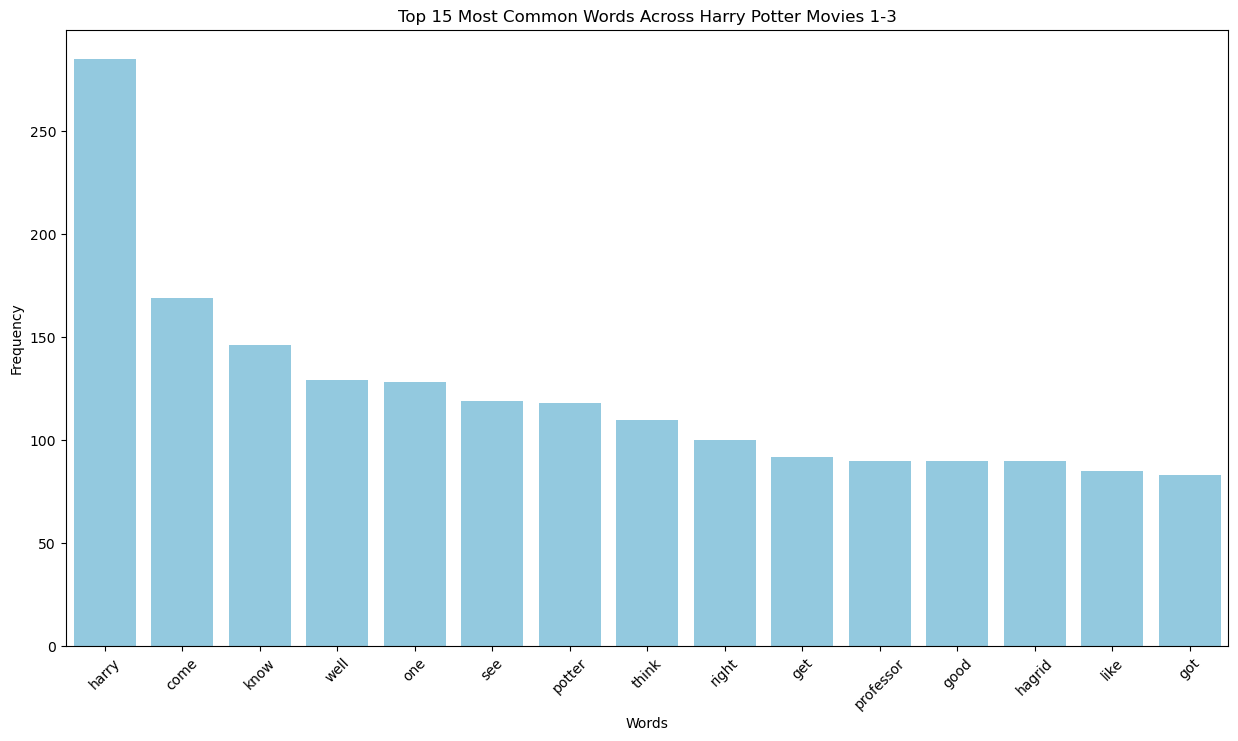

In [21]:
# Plotting with Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x='Word', y='Frequency', data=top_words_df, color='skyblue')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Words Across Harry Potter Movies 1-3')
plt.xticks(rotation=45)
plt.show()

## Understanding the Visualization - Top 15 Most Common Words
The frequency chart of the top 15 most common words captures the essence of the series' vocabulary. "Harry" stands out, reaffirming the narrative's focus on the protagonist. Words like "think" and "professor" frequently occur, pointing to the series' emphasis on intellectual discourse and the school setting.

## Most Common Words Analysis

Here, we identify the most frequently used words in the dialogues across all movies and analyze their significance.


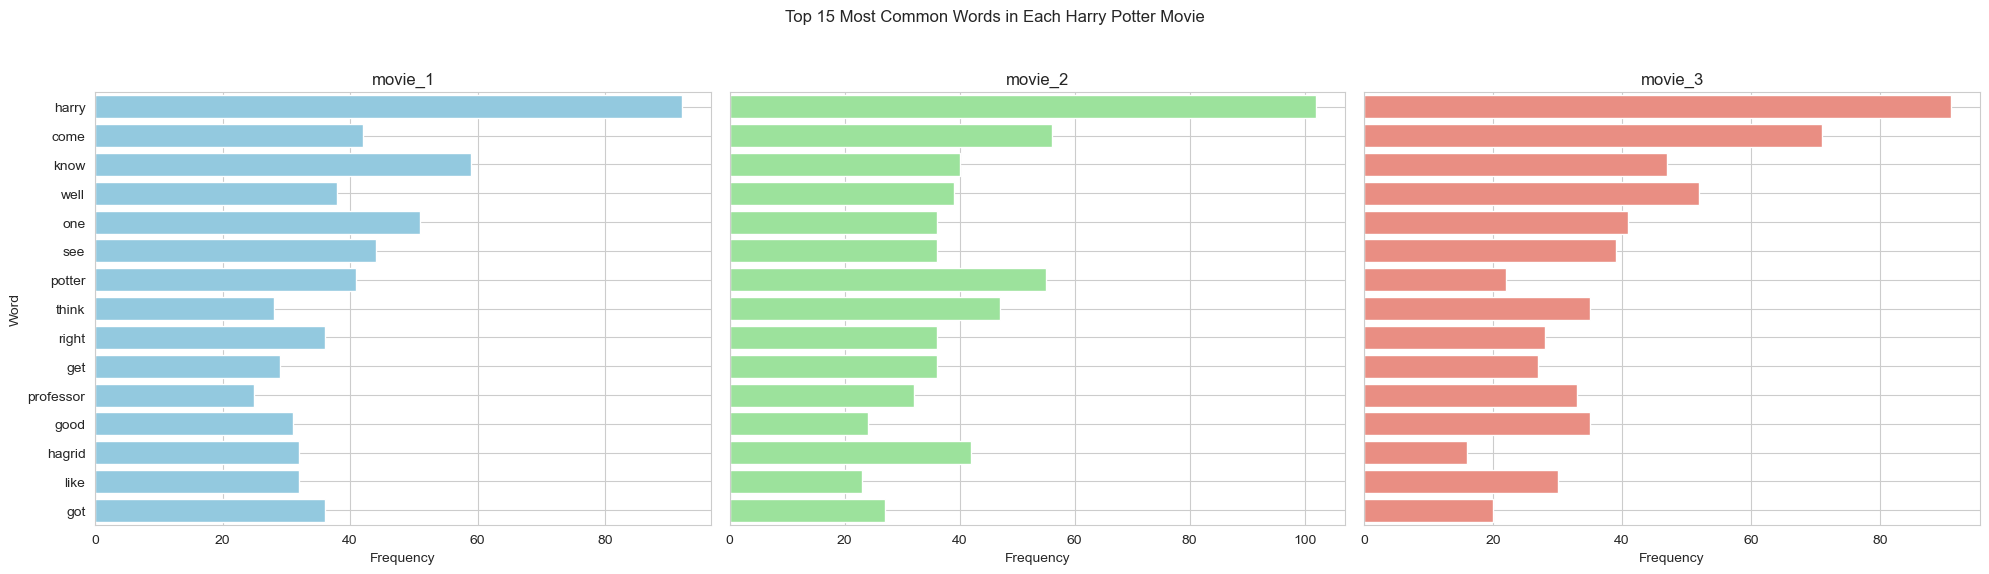

In [23]:
# Most repeated words per movie
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Top 15 Most Common Words in Each Harry Potter Movie')

movies = combined_df['Movie'].unique()
top_10_words = [word for word, freq in top_word_counts]
colors = ['skyblue', 'lightgreen', 'salmon']

for i, (ax, movie, color) in enumerate(zip(axes, sorted(movies), colors)):
    # Filter the DataFrame for the current movie
    movie_df = combined_df[combined_df['Movie'] == movie]
    movie_words = [word for sublist in movie_df['Tokens'] for word in sublist if word in top_10_words]
    word_counts_movie = Counter(movie_words)

    # Initialize and update frequencies for top 10 words
    words_freq = {word: 0 for word in top_10_words}
    words_freq.update({word: word_counts_movie[word] for word in word_counts_movie if word in top_10_words})

    # Convert to DataFrame and sort
    words_df = pd.DataFrame(list(words_freq.items()), columns=['Word', 'Frequency'])

    # Plotting with Seaborn
    sns.barplot(x='Frequency', y='Word', data=words_df, ax=ax, color=color)
    ax.set_title(f'{movie}')
    ax.set_xlabel('Frequency')

    # Add the y-axis label only to the first subplot
    if i == 0:
        ax.set_ylabel('Word')
    else:
        ax.set_ylabel('')
        ax.set_yticklabels([])  # Hide y-axis tick labels for all but the first subplot

    ax.xaxis.grid(True)
    ax.yaxis.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Understanding the Visualization - Most Common Words in Each Movie
Comparing the most common words across the three movies reveals evolving themes and character focus. The prevalence of specific words in individual films can indicate a movie's unique storyline or a particular character's prominence, such as "Lockhart" in the second movie.
There is no word in any part that occurs more than 100 times, and excluding the main character's name, no word has appeared more than 70 times in one movie.

## Find Top 15 Most Common Bigrams
Bigrams are pairs of consecutive words, and their frequency can reveal common phrases or themes that characters often discuss. This insight can help us understand the narrative's focus and the relationships between characters.

In [24]:
# Flatten the list of tokens for all rows to create one big list of words
all_words = [word for tokens in combined_df['Tokens'] for word in tokens]
all_words[:10]

['known',
 'would',
 'professor',
 'mcgonagall',
 'good',
 'evening',
 'professor',
 'dumbledore',
 'rumor',
 'true']

In [25]:
# # Generate and count bigrams
# bigrams_generated = list(bigrams(all_words))
# bigram_freq = Counter(bigrams_generated)
# top_15_bigrams = bigram_freq.most_common(15)

# Create bigrams
bigram_list = list(bigrams(all_words))

# Count bigrams
bigram_counts = Counter(bigram_list)

# Get the top 15 most common bigrams
top_15_bigrams = bigram_counts.most_common(15)

# Prepare data for plotting
bigrams, counts = zip(*top_15_bigrams)

## Visualization - Top 15 Most Common Bigrams
In this visualization, we explore the top 15 most common bigrams found across all dialogue in the first three Harry Potter movies. 

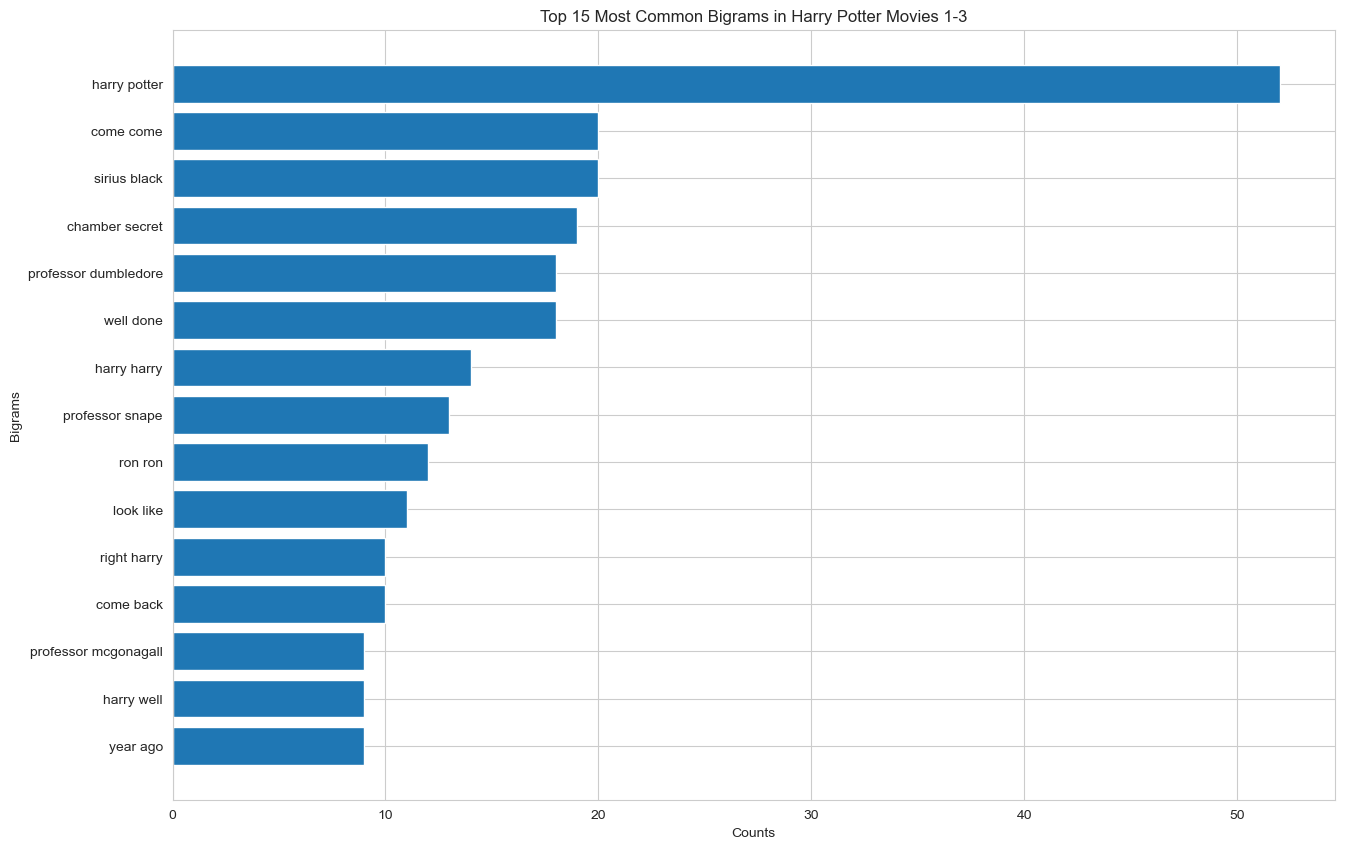

In [26]:
# Prepare data for plotting
bigrams, counts = zip(*top_15_bigrams)

# Plot
plt.figure(figsize=(15, 10))
plt.barh([' '.join(bigram) for bigram in bigrams], counts)
plt.xlabel('Counts')
plt.ylabel('Bigrams')
plt.title('Top 15 Most Common Bigrams in Harry Potter Movies 1-3')
plt.gca().invert_yaxis()  # Highest counts at the top
plt.show()

## Analysis of Top 15 Most Common Bigrams
- The horizontal bar chart reveals the most frequent bigrams, with 'harry potter' dominating the list, appearing over 50 times, which underscores the narrative's central focus on the protagonist.
- Repetitive bigrams like 'come come', 'harry harry', and 'ron ron', occurring more than 10 times each, may reflect a dramatic emphasis in the dialogues.
- Character names such as 'sirius black' and 'professor dumbledore', each appearing numerous times, highlight these figures' importance in the storyline.
- Notably, plot-centric phrases such as 'chamber secret' appear over 20 times, indicating key narrative elements that drive the movie's plot forward.

## Find Top 15 Most Common Trigrams
Trigrams, which are sequences of three consecutive words, provide a deeper insight into the recurring language patterns and themes that might be unique to the series. Observing these trigrams can give us a more nuanced view of the dialogue's context and the storytelling style of the movies.


In [27]:
# Create trigrams
trigram_list = list(trigrams(all_words))

# Count trigrams
trigram_counts = Counter(trigram_list)

# Get the top 15 most common trigrams
top_15_trigrams = trigram_counts.most_common(15)

## Visualization - Top 15 Most Common Trigrams
This chart displays the top 15 most common trigrams from the Harry Potter movie dialogues. 

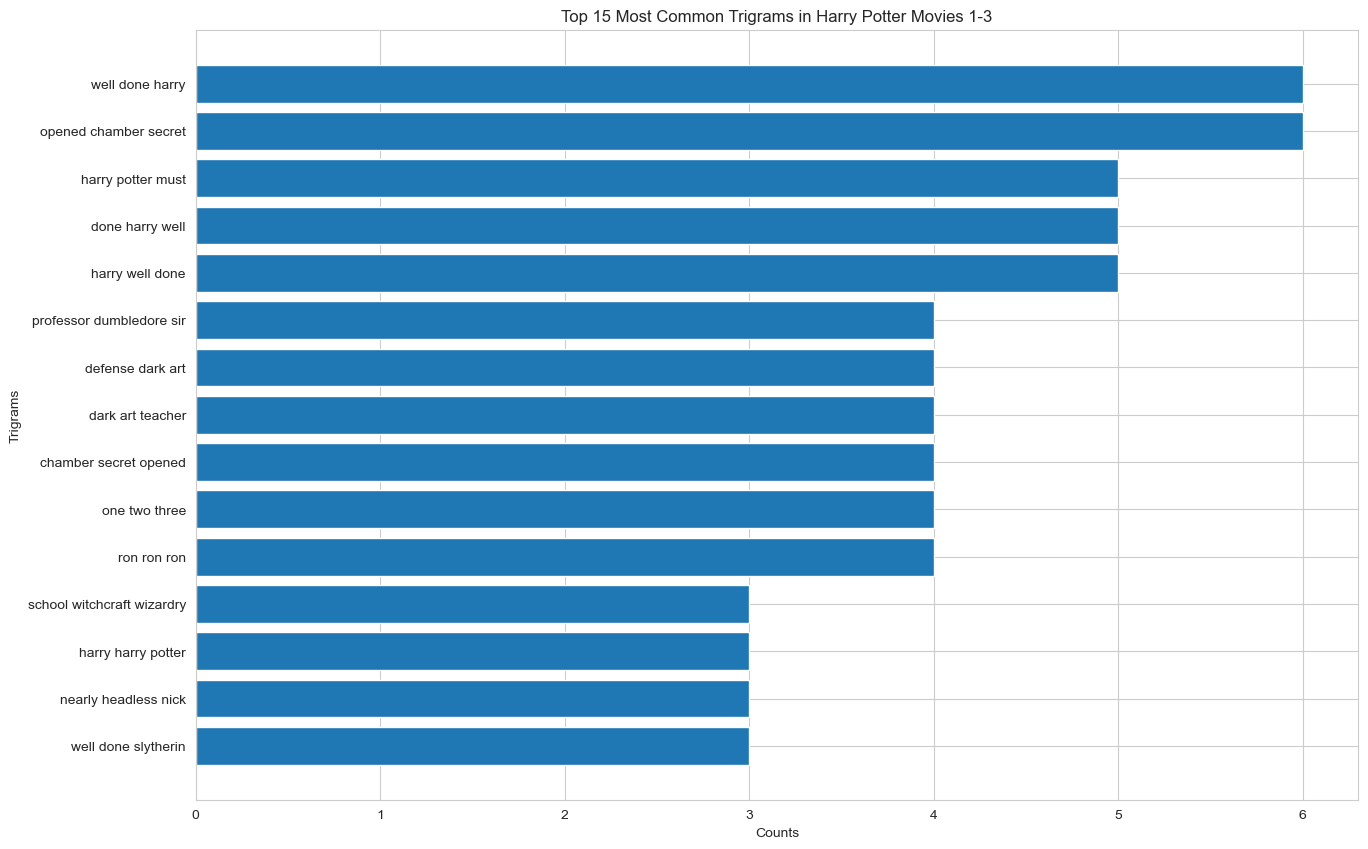

In [28]:
# Prepare data for plotting
trigrams, counts = zip(*top_15_trigrams)

# Plot
plt.figure(figsize=(15, 10))
plt.barh([' '.join(trigram) for trigram in trigrams], counts)
plt.xlabel('Counts')
plt.ylabel('Trigrams')
plt.title('Top 15 Most Common Trigrams in Harry Potter Movies 1-3')
plt.gca().invert_yaxis()
plt.show()

## Analysis of Top 15 Most Common Trigrams
- This trigrams bar chart expands on the context provided by the bigrams, showing the most frequently occurring three-word sequences.
- The phrase 'well done harry' leads the chart, suggesting recurring scenes where Harry is commended, occurring about 6 times. 
- The presence of 'harry potter must' about 5 times could reflect a narrative emphasis on the character's destiny and choices.
- The repetition of 'ron ron ron' indicates not just the character's prominence but possibly a linguistic pattern in how characters address or refer to each other in moments of distress or urgency.

# Sentiment Analysis on Movie Dialogues
Sentiment analysis is a method used to evaluate the emotional tone behind a sequence of words. It is commonly applied to understand the sentiment of customer reviews, feedback, and social media conversations. In the context of movie dialogues, sentiment analysis can provide insights into the emotional undertones of character interactions and the general mood conveyed by the script.

We apply the `Vader` sentiment analyzer from the NLTK library to each unprocessed dialogue line. This tool is particularly effective as it is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It also understands common linguistic nuances such as capitalization, exclamation marks, and degree modifiers (e.g., "very good" vs. "good").

By using the whole sentences, including stopwords, we preserve the original context and allow Vader to more accurately determine sentiment scores. Each dialogue is classified as 'positive', 'neutral', or 'negative' based on its compound sentiment score.


In [30]:
download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shreenithi/nltk_data...


True

In [32]:
sia = SentimentIntensityAnalyzer()

# Apply the analyzer to the sentences without preprocessing
combined_df['Sentiment'] = combined_df['Sentence'].apply(lambda x: sia.polarity_scores(x))

combined_df['Sentiment']

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...
2       {'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.372, 'neu': 0.319, 'pos': 0.309, 'co...
                              ...                        
1633    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1634    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1635    {'neg': 0.281, 'neu': 0.331, 'pos': 0.388, 'co...
1636    {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'comp...
1637    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentiment, Length: 4925, dtype: object

In [33]:
# Extract compound scores
combined_df['Compound'] = combined_df['Sentiment'].apply(lambda x: x['compound'])

combined_df['Compound']

0       0.0000
1       0.4404
2       0.4215
3       0.0000
4      -0.1531
         ...  
1633    0.0000
1634    0.0000
1635    0.3182
1636   -0.3612
1637    0.0000
Name: Compound, Length: 4925, dtype: float64

In [34]:
# Categorize sentiments as positive, neutral, or negative
combined_df['Sentiment_Category'] = combined_df['Compound'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)

combined_df['Sentiment_Category']

0        neutral
1       positive
2       positive
3        neutral
4       negative
          ...   
1633     neutral
1634     neutral
1635    positive
1636    negative
1637     neutral
Name: Sentiment_Category, Length: 4925, dtype: object

## Visualization of Sentiment Distribution
The bar chart visualizes the distribution of sentiments across all dialogues in the Harry Potter movie series. By quantifying the number of positive, neutral, and negative dialogues, we can infer the overall emotional landscape of the series. Such an analysis might reveal, for instance, whether the movies lean towards a darker and more serious tone or a more light-hearted and positive one.

This information is particularly useful for scriptwriters, directors, and marketers who aim to understand the emotional pacing of a movie or series and how it might be received by audiences. It could also highlight shifts in tone between different movies in the series.


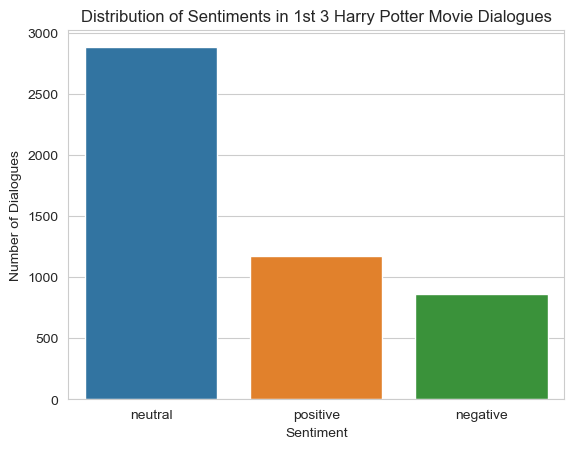

In [36]:
import seaborn as sns

# Count the number of each sentiment
sentiment_counts = combined_df['Sentiment_Category'].value_counts()

# Create a bar plot
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiments in 1st 3 Harry Potter Movie Dialogues')
plt.ylabel('Number of Dialogues')
plt.xlabel('Sentiment')
plt.show()


## Proportional Sentiment Analysis Across Movies
To understand how the sentiment of dialogues is distributed within each Harry Potter movie, we compute the relative proportions of positive, neutral, and negative sentiments. This approach normalizes the data, allowing us to compare the emotional tone of each movie irrespective of the number of dialogues


Sentiment_Category    Movie  negative   neutral  positive
0                   movie_1  0.172023  0.599874  0.228103
1                   movie_2  0.189412  0.582353  0.228235
2                   movie_3  0.165446  0.574481  0.260073


/var/folders/88/0f5f1p916w74tt58_3fz2k7m0000gn/T/ipykernel_79060/1796493648.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: x / float(x.sum()))


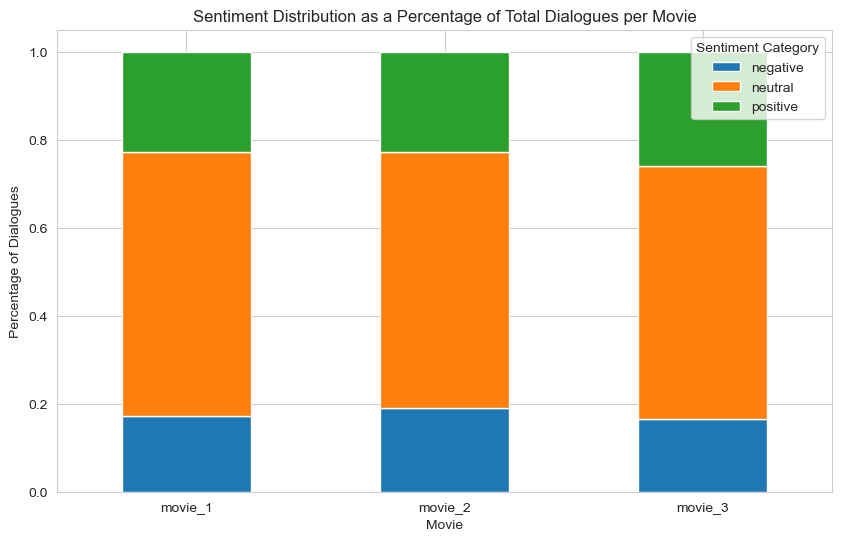

In [44]:
# Group by 'Movie' and 'Sentiment_Category' and get the proportion
sentiment_distribution = (combined_df.groupby(['Movie', 'Sentiment_Category'], group_keys=False)
                          .size()
                          .groupby(level=0)
                          .apply(lambda x: x / float(x.sum()))
                          .unstack())

# Reset the index to get 'Movie' as a column instead of an index
sentiment_distribution.reset_index(inplace=True)
print(sentiment_distribution)
# Plotting the 100% stacked bar chart
sentiment_distribution.plot(x='Movie', kind='bar', stacked=True, figsize=(10, 6),
                            color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Adding labels and title
plt.title('Sentiment Distribution as a Percentage of Total Dialogues per Movie')
plt.xlabel('Movie')
plt.ylabel('Percentage of Dialogues')
plt.legend(title='Sentiment Category')
plt.xticks(rotation=0)  # Keeps the movie names horizontal
plt.show()


## Sentiment Distribution Observations Across Harry Potter Movies

- **Movie 1**:
  - Exhibits a balanced sentiment distribution with nearly 60% of dialogues categorized as neutral, which may represent exposition or narrative development.
  - Positive sentiments are present in approximately 23% of dialogues, suggesting a significant presence of uplifting or hopeful scenes.
  - Negative sentiments account for roughly 17% of the dialogues, indicating the presence of conflict or challenges within the plot.

- **Movie 2**:
  - Shows a slight increase in negative sentiment to roughly 19% compared to Movie 1, possibly reflecting a darker or more complex storyline.
  - Neutral dialogues make up about 58% of the movie, maintaining a majority but showing a slight decrease, which could suggest a shift toward more emotionally charged content.
  - Positive sentiment remains consistent with Movie 1 at approximately 23%, indicating a continued balance of affirmative dialogue despite the darker undertones.

- **Movie 3**:
  - Reveals a decrease in negative sentiment to approximately 17%, indicating a slight shift away from conflict-laden dialogue compared to Movie 2.
  - Neutral dialogues constitute roughly 57%, slightly less than the previous movies, which may imply a gradual move towards more emotionally expressive content.
  - Positive sentiments see an increase to around 26%, the highest among the three movies, suggesting an increase in scenes with positive resolutions or cheerful interactions.

Across the three movies, we observe a trend where neutral sentiment slightly decreases, while positive sentiment increases, possibly reflecting the narrative progression from a relatively light-hearted beginning towards a more complex, emotionally diverse middle, and then resolving towards a more positive conclusion in the third movie.


## Word Frequency by Sentiment

The chart visualizing the top 15 most frequent words colored by sentiment category serves to quickly convey not just which words are most common, but also the emotional context they're used in. It provides at-a-glance insights into the mood of dialogues, showing whether key terms are generally used in positive, negative, or neutral circumstances within the Harry Potter movies.


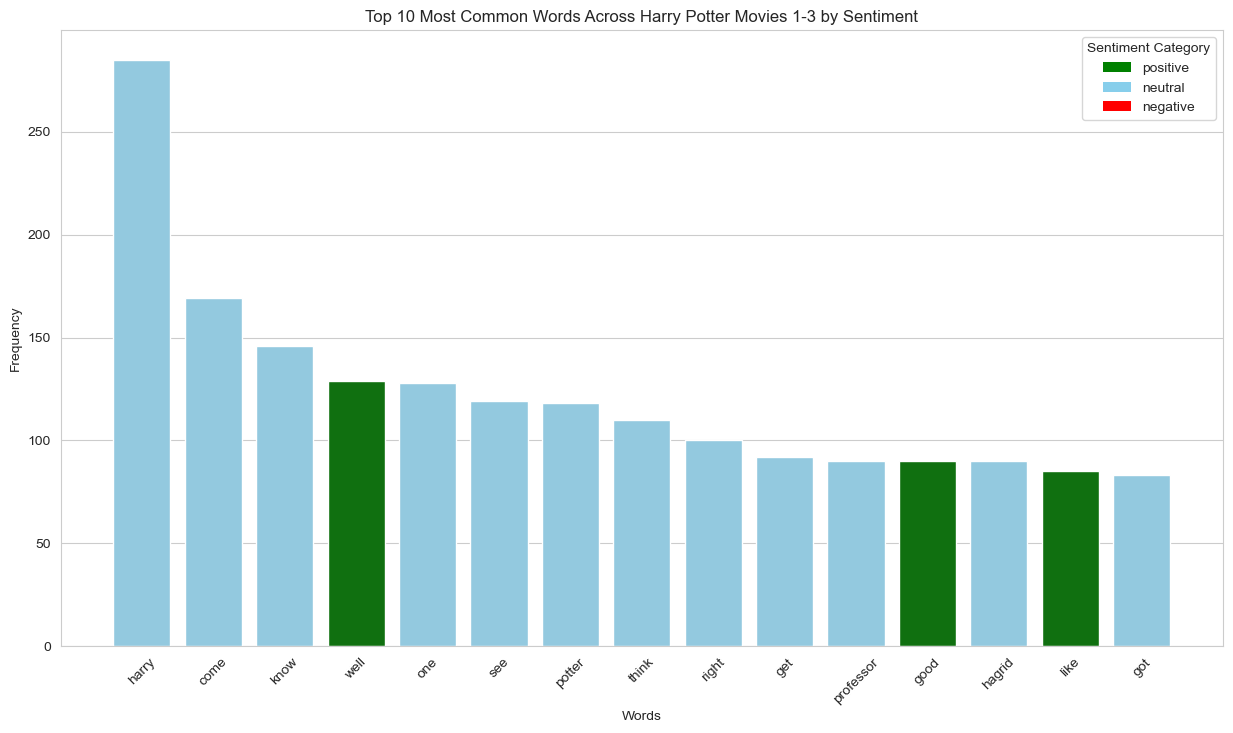

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to assign a sentiment based on compound score
def get_word_sentiment(word):
    return sia.polarity_scores(word)['compound']

# Apply sentiment analysis to each word
top_words_df['Sentiment'] = top_words_df['Word'].apply(get_word_sentiment)

# Categorize sentiments as positive, neutral, or negative based on compound score
top_words_df['Sentiment_Category'] = top_words_df['Sentiment'].apply(
    lambda c: 'positive' if c > 0.05 else ('negative' if c < -0.05 else 'neutral')
)

# Plotting with Seaborn
plt.figure(figsize=(15, 8))
palette = {'positive': 'green', 'neutral': 'skyblue', 'negative': 'red'}
# Plot the data using seaborn's barplot with the mapped colors
barplot = sns.barplot(
    x='Word', 
    y='Frequency', 
    data=top_words_df.head(15),  # Ensure this matches the number of bars you want to show
    palette=top_words_df.head(15)['Sentiment_Category'].map(palette)
)

# Add labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words Across Harry Potter Movies 1-3 by Sentiment')

# Rotate the x-labels for better readability
plt.xticks(rotation=45)

# Here we add the legend manually
for category, color in palette.items():
    plt.bar(0, 0, color=color, label=category, edgecolor='none')

# Display the legend
plt.legend(title='Sentiment Category')

# Show the plot
plt.show()

## Sentiment Analysis of Frequent Words in Harry Potter Movies 1-3

The bar chart visualizes the top 10 most frequently occurring words across the first three Harry Potter movies, with colors representing the sentiment analysis classification of each word:

- Words such as 'well', 'good', and 'like' are highlighted in green, denoting a positive sentiment. These words are generally associated with positive emotions or approval, which aligns with VADER's sentiment classification.
- The majority of words are colored in sky blue, suggesting a neutral sentiment. This indicates that most of the frequent words are used in a context that does not convey strong positive or negative emotions, or they are used in a variety of contexts that balance out to a neutral sentiment.
- Interestingly, none of the top 15 words are marked with red, which would indicate negative sentiment. This absence may suggest that the overall tone of the dialogues is either neutral or positive, rather than negative.
- VADER might not capture the specific sentiment of terms uniquely associated with the Harry Potter world, which can result in a default neutral classification. This highlights the challenge of applying general sentiment analysis tools to domain-specific content.


# Conclusion
## Sentiment and Narrative Dynamics in Harry Potter Movies 1-3

## Key Findings
- **Character Development:** Increasing dialogue lengths for certain characters indicate their growing significance in the narrative, like Hermione.
- **Character and Plot Focus:** Frequent mentions of key characters and plot elements (e.g., 'Harry Potter', 'chamber secret') underline narrative priorities.
- **Positive and Neutral Tones:** Predominantly positive and neutral sentiments across dialogues, with minimal negative expressions.
- **Evolving Sentiments:** A shift from balanced to slightly darker tones in the second movie, returning to more positive sentiments in the third.


## Overall Insights
The analysis showcases a narrative journey from a balanced mix of emotions to darker undertones, concluding with an uplift in positivity. This progression aligns with character development and thematic deepening, emphasizing the series' ability to evolve and engage.